In [3]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train=pd.read_csv("digit-recognizer/train.csv",dtype=np.float32)

In [5]:
targets_numpy=train.label.values

In [6]:
features_numpy=train.loc[:,train.columns != "label"].values/255

In [7]:
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 

In [8]:
featuresTrain=torch.from_numpy(features_train)
targetsTrain=torch.from_numpy(targets_train).type(torch.LongTensor)

In [9]:
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)

In [10]:
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

In [11]:
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

In [12]:
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

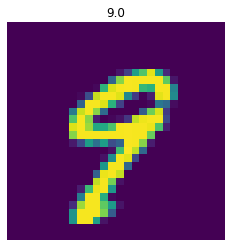

In [13]:
plt.imshow(features_numpy[11].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[11]))
plt.savefig('graph.png')
plt.show()

In [14]:
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        # Linear function 1: 784 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2: 150 --> 150
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()
        
        # Linear function 3: 150 --> 150
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.elu3 = nn.ELU()
        
        # Linear function 4 (readout): 150 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)
        
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.elu3(out)
        
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

In [18]:
input_dim=28*28
hidden_dim=150
output_dim=10

In [20]:
model= ANNModel(input_dim,hidden_dim,output_dim)

error=nn.CrossEntropyLoss()

learning_rate=0.02

optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

Iteration: 500  Loss: 0.04880310967564583  Accuracy: 96.5 %
Iteration: 1000  Loss: 0.0334482304751873  Accuracy: 96.47618865966797 %
Iteration: 1500  Loss: 0.01790488325059414  Accuracy: 96.6547622680664 %
Iteration: 2000  Loss: 0.03537406772375107  Accuracy: 96.63095092773438 %
Iteration: 2500  Loss: 0.06031487509608269  Accuracy: 96.6547622680664 %
Iteration: 3000  Loss: 0.016362052410840988  Accuracy: 96.66666412353516 %
Iteration: 3500  Loss: 0.03364602476358414  Accuracy: 96.71428680419922 %
Iteration: 4000  Loss: 0.010500133037567139  Accuracy: 96.83333587646484 %
Iteration: 4500  Loss: 0.039272699505090714  Accuracy: 96.79762268066406 %
Iteration: 5000  Loss: 0.019516542553901672  Accuracy: 96.86904907226562 %
Iteration: 5500  Loss: 0.08718343824148178  Accuracy: 96.70237731933594 %
Iteration: 6000  Loss: 0.03337704762816429  Accuracy: 96.8452377319336 %
Iteration: 6500  Loss: 0.057956866919994354  Accuracy: 96.96428680419922 %
Iteration: 7000  Loss: 0.020375313237309456  Accura

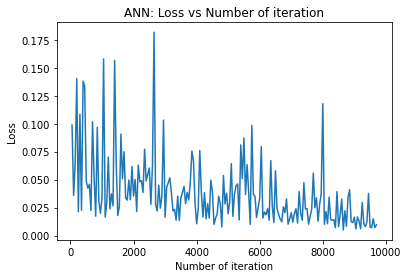

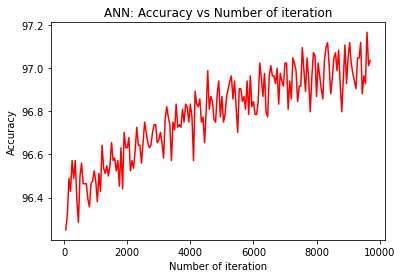

In [23]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))
            
            
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualizatio n accuracy  
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()
